In [50]:
import numpy as np                                                             #Must normalize spectra (i.e. find median value across each spectrum, and then divide each spectrum by this value.)
from astropy.io import fits
import matplotlib.pyplot as py
import myAstroMods as mm
import importlib as imp
from astropy.stats import sigma_clip
from astropy.convolution import convolve, Box1DKernel, Gaussian1DKernel
import matplotlib.path
imp.reload(mm)
%matplotlib inline

In [5]:
hdu = fits.open('/Users/Jonhays/Documents/ASTRO/FITS/SPLASH/subMasterSPLASH.fits')
hdu2 = fits.open('/Users/Jonhays/Documents/ASTRO/FITS/SPLASH/carbonSPLASHdata/nonCarbonSPLASH.fits')
hdu3 = fits.open('/Users/Jonhays/Documents/ASTRO/FITS/SPLASH/carbonSPLASHdata/marginalCarbonSPLASH.fits')
hdu4 = fits.open('/Users/Jonhays/Documents/ASTRO/FITS/SPLASH/carbonSPLASHdata/weakCarbonSPLASH.fits')
hdu5 = fits.open('/Users/Jonhays/Documents/ASTRO/FITS/SPLASH/carbonSPLASHdata/mediumCarbonSPLASH.fits')
hdu6 = fits.open('/Users/Jonhays/Documents/ASTRO/FITS/SPLASH/carbonSPLASHdata/strongCarbonSPLASH.fits')
hdu7 = fits.open('/Users/Jonhays/Documents/ASTRO/FITS/SPLASH/carbonSPLASHdata/extremeCarbonSPLASH.fits')
wNmIndices = np.load('wNmIndices.npy')


In [9]:
data = hdu[1].data           # All data
ncData = hdu2[1].data        # non-cargon data
marData = hdu3[1].data       # marginal carbon data
wcData = hdu4[1].data        # weak carbon data
mcData = hdu5[1].data        # medium carbon data
scData = hdu6[1].data        # strong carbon data
exData = hdu7[1].data        # extreme carbon data
wNm_data = data[wNmIndices]  # Weak and marginal data




In [10]:
fluxnorm = []
ivarnorm = []
for i in range(len(wNm_data)):
    [fluxtemp, ivartemp ] = mm.normal(wNm_data['SPEC'][i], wNm_data['IVAR'][i])
    fluxnorm += [fluxtemp]
    ivarnorm += [ivartemp]
fluxnorm = np.array(fluxnorm)
ivarnorm = np.array(ivarnorm)


/Users/jonhays/Documents/ASTRO/Python notebooks/myAstroMods.py:99: RuntimeWarning: divide by zero encountered in true_divide
  nor = 1 / np.median(centralSpec)
/Users/jonhays/Documents/ASTRO/Python notebooks/myAstroMods.py:100: RuntimeWarning: invalid value encountered in multiply
  normalSpec = nor*specData


In [11]:
wv = wNm_data['LBIN'][0]

In [15]:
# Coaddition of weak AND marginal carbon stars using Katie's weighted ave. method
coaddspec, coaddivar, clipspec, clipivar = mm.sigclip_coadd_arr(wNm_data['LBIN'], fluxnorm, ivarnorm, verbose = True)
clipspec5, clipivar5 = mm.sigclip_coadd_arr(wNm_data['LBIN'], fluxnorm, ivarnorm, sigLim = 5)

/Users/jonhays/Documents/ASTRO/Python notebooks/myAstroMods.py:184: RuntimeWarning: invalid value encountered in multiply
  coaddspec = np.nansum(spec*ivar, axis = 0)/coaddivar
/Users/jonhays/Documents/ASTRO/Python notebooks/myAstroMods.py:197: RuntimeWarning: invalid value encountered in less
  subspec.append(np.nansum(s[nsig < sigLim]*iv[nsig < sigLim]))
/Users/jonhays/Documents/ASTRO/Python notebooks/myAstroMods.py:198: RuntimeWarning: invalid value encountered in less
  clipivar.append(np.nansum(iv[nsig < sigLim]))
/Users/jonhays/Documents/ASTRO/Python notebooks/myAstroMods.py:196: RuntimeWarning: invalid value encountered in multiply
  nsig = np.abs((s - coaddspec[j])*np.sqrt(iv))
/Users/jonhays/Documents/ASTRO/Python notebooks/myAstroMods.py:196: RuntimeWarning: invalid value encountered in subtract
  nsig = np.abs((s - coaddspec[j])*np.sqrt(iv))
/Users/jonhays/Documents/ASTRO/Python notebooks/myAstroMods.py:200: RuntimeWarning: invalid value encountered in true_divide
  clipspec

In [16]:
# Coaddition of weak/marginal carbon stars using Elisa's median method
wNmCoadd3med = mm.coadd_med(fluxnorm, ivarnorm, wv)

/Users/jonhays/Documents/ASTRO/Python notebooks/myAstroMods.py:316: RuntimeWarning: invalid value encountered in multiply
  sigdiff=abs(fluxnorm-medflux)*np.sqrt(ivarnorm)
/Users/jonhays/Documents/ASTRO/Python notebooks/myAstroMods.py:318: RuntimeWarning: invalid value encountered in greater
  clip[sigdiff>siglim]=0
/Users/jonhays/Documents/ASTRO/Python notebooks/myAstroMods.py:320: RuntimeWarning: invalid value encountered in multiply
  coadd=np.nansum((fluxnorm*ivarnorm)*clip,0)/np.nansum(ivarnorm*clip,0)
/Users/jonhays/Documents/ASTRO/Python notebooks/myAstroMods.py:320: RuntimeWarning: invalid value encountered in true_divide
  coadd=np.nansum((fluxnorm*ivarnorm)*clip,0)/np.nansum(ivarnorm*clip,0)
/Users/jonhays/Documents/ASTRO/Python notebooks/myAstroMods.py:321: RuntimeWarning: divide by zero encountered in true_divide
  coadderr=1/np.sqrt(np.nansum(ivarnorm*clip,0))


In [17]:
# Defining smoothing kernels (currently not in unused)
gauss = Gaussian1DKernel(13)
box = Box1DKernel(13)
smoothSpec = convolve(clipspec5, gauss)

(0, 1.6)

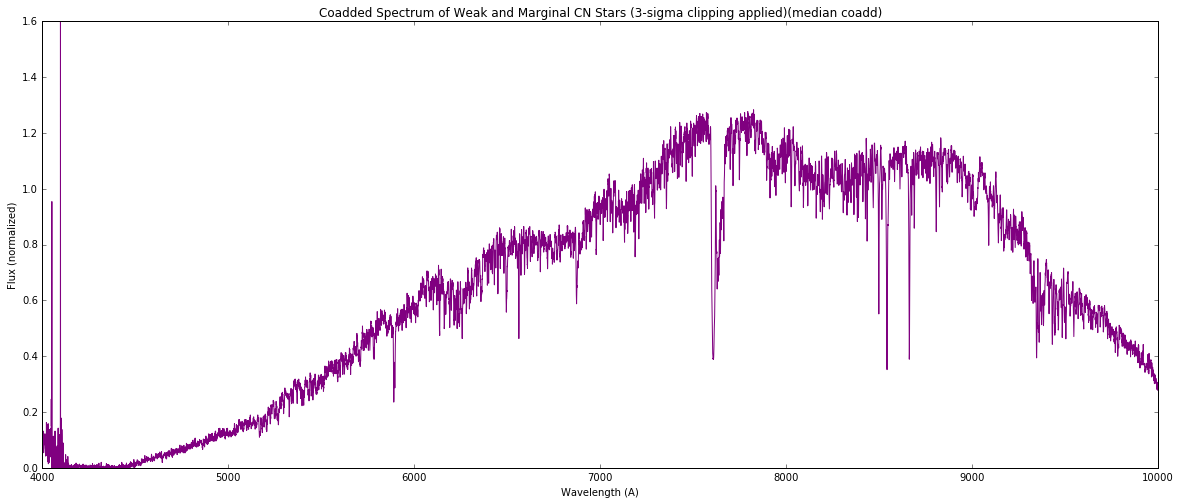

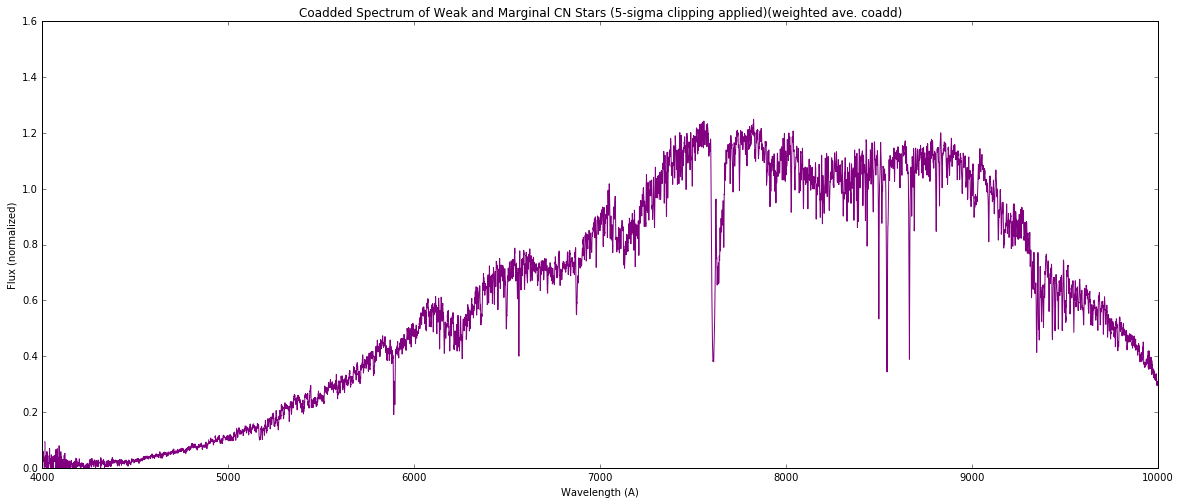

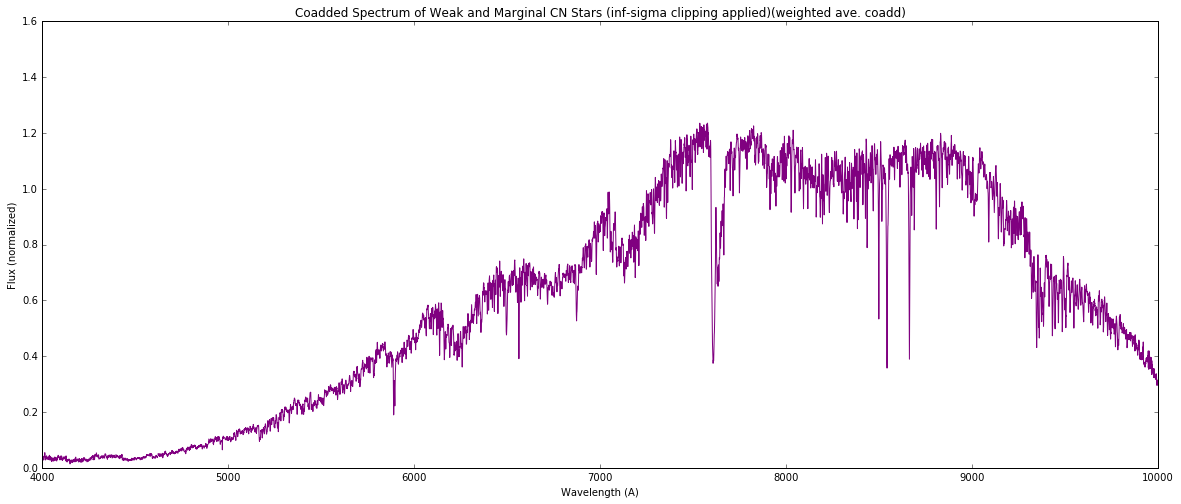

In [19]:
# Visual testing of different amounts/methods of clipspec; surprisingly, simple coaddition with inf-sigma (no clipspec)
# seems to yield the cleanest spectrum.

py.rcParams['figure.figsize'] = 20, 8
py.plot(wv, wNmCoadd3med, 'purple')
py.title('Coadded Spectrum of Weak and Marginal CN Stars (3-sigma clipping applied)(median coadd)')
py.xlabel('Wavelength (A)')
py.ylabel('Flux (normalized)')
py.ylim([0, 1.6])

py.figure(2)
py.plot(wv, clipspec5, 'purple')
py.title('Coadded Spectrum of Weak and Marginal CN Stars (5-sigma clipping applied)(weighted ave. coadd)')
py.xlabel('Wavelength (A)')
py.ylabel('Flux (normalized)')
# py.xlim([7000, 7100])
py.ylim([0, 1.6])

py.figure(3)
py.plot(wv, coaddspec, 'purple')
py.title('Coadded Spectrum of Weak and Marginal CN Stars (inf-sigma clipping applied)(weighted ave. coadd)')
py.xlabel('Wavelength (A)')
py.ylabel('Flux (normalized)')
# py.xlim([7000, 7100])
py.ylim([0, 1.6])




In [31]:
# This is good! Now do a coaddtion of strong carbon, and non-carbons that fall in same area as weak/marginal carbon stars on CMD, AND n
# non-carbons that fall in same area as strong carbon stars on CMD

In [33]:
weakCy = wNm_data['F160W']
weakCx = wNm_data['F814W'] - wNm_data['F160W']
strongCy = scData['F160W']
strongCx = scData['F814W'] - scData['F160W']

In [20]:
# Lines to determine edges of weak/marginal and strong bins

m = (19 - -52.965)/(2.03045-10)     # Slope of Phil's line, derived from the two points on A^3's plot


# 
x1 = np.arange(1.405, 1.72, .01)
x2 = np.arange(1.925, 2.24, .01)
x3 = np.arange(2.215, 2.374, .005)
x4 = np.arange(2.793, 2.945, .005)
x5 = np.arange(1.09, 1.405, .005)
x6 = np.arange(1.61, 1.925, .005)
x7 = np.arange(2.056, 2.215, .005)
x8 = np.arange(2.63, 2.790, .005)
x9 = np.arange(2.675, 2.99, .01)
x10 = np.arange(3.195, 3.51, .01)
xPhil = np.arange(1, 3, .01)

# Equations of lines determined by using slope of Phil's line, and some guess and check work to find proper y-intercept
y1 = m*x1 + 32
y2 = m*x2 + 36.7
y3 = m*x3 + 37.9
y4 = m*x4 + 43.1
y5 = m*x5 + 32
y6 = m*x6 + 36.7
y7 = m*x7 + 37.9
y8 = m*x8 + 43.1
y9 = m*x9 + 43.45
y10 = m*x10 + 48.15
yPhil = m*xPhil - 2.0345*m + 19     # equation of phil's line

-9.029995420067634

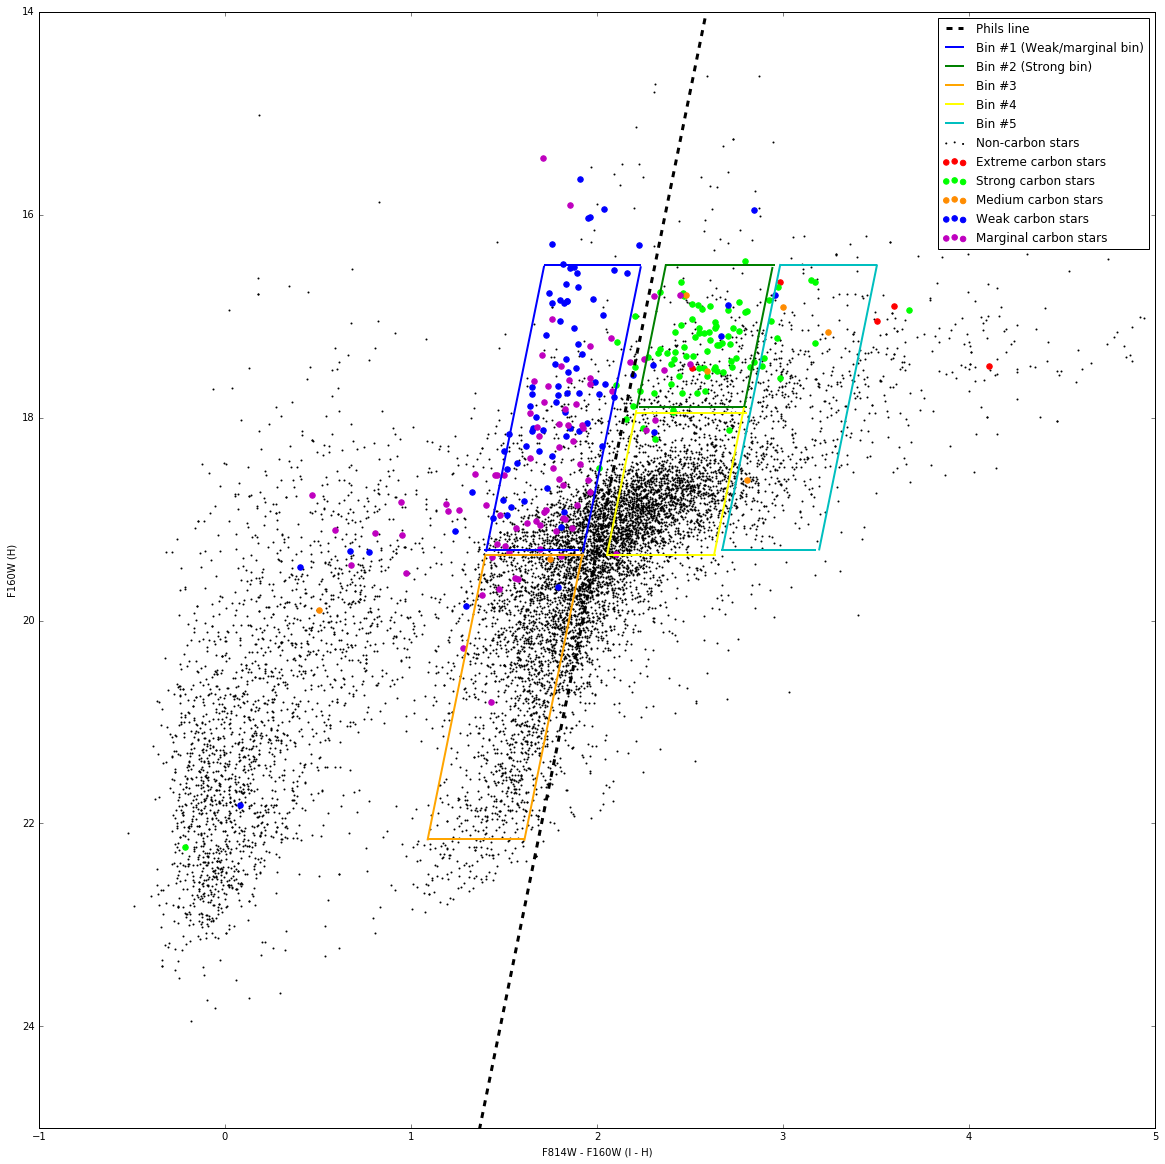

In [61]:
# Plotting all types of stars on H vs. I-H, and defining different bins determined by the slope of phil's line

py.rcParams['figure.figsize'] = 20,20
mm.cmd_plot2(ncData, range(len(ncData)), 1, 'k', label = 'Non-carbon stars') #NONCARBON stars are BLACK and smaller
mm.cmd_plot2(exData, range(len(exData)), 30, 'r', label = 'Extreme carbon stars') #EXTREME carbon stars are RED
mm.cmd_plot2(scData, range(len(scData)), 30, 'lime', label = 'Strong carbon stars') #STRONG carbon stars are LIME
mm.cmd_plot2(mcData, range(len(mcData)), 30, 'darkorange', label = 'Medium carbon stars')#MEDIUM carbon stars are DARK ORANGE
mm.cmd_plot2(wcData, range(len(wcData)), 30, 'b', label = 'Weak carbon stars') #WEAK carbon stars are BLUE
mm.cmd_plot2(marData, range(len(marData)), 30, 'm', label = 'Marginal carbon stars') #MARGINAL carbon stars are MAGENTA 

# py.scatter(3.5,14.13,s=5,color='k')
# py.scatter(3.5,14.27,s=40,color='r')
# py.scatter(3.5,14.41,s=40,color='lime')
# py.scatter(3.5,14.55,s=40,color='darkorange')
# py.scatter(3.5,14.69,s=40,color='b')
# py.scatter(3.5,14.83,s=40,color='m')

py.plot(xPhil, yPhil, color = 'k', linewidth = 3, linestyle = '--', label = 'Phil''s line')


# Weak/marginal bin
py.plot(x1, y1, color = 'blue', linewidth = 2, label = 'Bin #1 (Weak/marginal bin)')
py.plot(x2, y2, 'blue', linewidth = 2)
py.plot([1.72, 2.23], [16.5, 16.5], 'blue', linewidth = 2)
py.plot([1.4, 1.9], [19.3, 19.3], 'blue', linewidth = 2)

# Strong Carbon bin
py.plot(x3, y3, 'green', linewidth = 2, label = 'Bin #2 (Strong bin)')
py.plot(x4, y4, 'green', linewidth = 2)
py.plot([2.37, 2.95], [16.5, 16.5], 'green', linewidth = 2)
py.plot([2.23, 2.8], [17.9, 17.9], 'green', linewidth = 2)

# bin #3
py.plot(x5, y5, color = 'orange', linewidth = 2, label = 'Bin #3')
py.plot(x6, y6, 'orange', linewidth = 2)
py.plot([1.405, 1.925], [19.35, 19.35], 'orange', linewidth = 2)
py.plot([1.09, 1.61], [22.15, 22.15], 'orange', linewidth = 2)

# bin #4
bin4 = py.Polygon([[2.99, 16.5], [2.67, 19.3], [3.17, 19.3], [3.50, 16.5]], color = 'cyan', fill = False, label ='Bin #5', linewidth = 2)
py.gca().add_patch(bin5)
mask = bin5.contains_point([1,0])
py.points_inside_poly([ncData['F160W'], ncData['F814W']] ,[[2.99, 16.5], [2.67, 19.3], [3.17, 19.3], [3.50, 16.5]])
# py.plot(x7, y7, 'yellow', linewidth = 2, label = 'Bin #4')
# py.plot(x8, y8, 'yellow', linewidth = 2)
# py.plot([2.215, 2.8], [17.95, 17.95], 'yellow', linewidth = 2)
# py.plot([2.056, 2.636], [19.35, 19.35], 'yellow', linewidth = 2)

# bin #5
bin5 = py.Polygon([[2.99, 16.5], [2.67, 19.3], [3.17, 19.3], [3.50, 16.5]], color = 'cyan', fill = False, label ='Bin #5', linewidth = 2)
py.gca().add_patch(bin5)
mask = bin5.contains_point([1,0])
py.points_inside_poly([ncData['F160W'], ncData['F814W']] ,[[2.99, 16.5], [2.67, 19.3], [3.17, 19.3], [3.50, 16.5]])
# py.plot(x9, y9, color = 'c', linewidth = 2, label = 'Bin #5')
# py.plot(x10, y10, 'c', linewidth = 2)
# py.plot([2.99, 3.50], [16.5, 16.5], 'c', linewidth = 2)
# py.plot([2.67, 3.17], [19.3, 19.3], 'c', linewidth = 2)


py.xlim(-1, 5)
py.ylim(25, 14)

py.xlabel('F814W - F160W (I - H)')
py.ylabel('F160W (H)')
py.legend()

In [364]:
# Extracting indices (subMaster) for non carbon stars that reside in the same area as weak/marginal carbon stars on 160 vs. 814 - 160 plot.
weakZoneIndices = [i for i in range(len(ncData)) if ncData['F160W'][i] > 16.5 and ncData['F160W'][i] < 19.3 and
                  (ncData['F814W'][i] - ncData['F160W'][i]) > ((1/m)*ncData['F160W'][i] - 32/m) and 
                  (ncData['F814W'][i] - ncData['F160W'][i]) < ((1/m)*ncData['F160W'][i] - 36.7/m)]

In [365]:
# Pulling data for non carbon stars that reside in the same area as strong carbon stars on 160 vs. 814 - 160 plot.
strongZoneIndices = [i for i in range(len(ncData)) if ncData['F160W'][i] > 16.5 and ncData['F160W'][i] < 17.9 and
                     (ncData['F814W'][i] - ncData['F160W'][i]) > ((1/m)*ncData['F160W'][i] - 37.9/m)
                     and (ncData['F814W'][i] - ncData['F160W'][i]) < ((1/m)*ncData['F160W'][i] - 43.1/m)]            

In [366]:
# Pulling data for non carbon stars that reside in bin #3 on 160 vs. 814 - 160 plot.
bin3Indices = [i for i in range(len(ncData)) if ncData['F160W'][i] > 19.35 and ncData['F160W'][i] < 22.15 and
              (ncData['F814W'][i] - ncData['F160W'][i]) > ((1/m)*ncData['F160W'][i] - 32/m)
               and (ncData['F814W'][i] - ncData['F160W'][i]) < ((1/m)*ncData['F160W'][i] - 36.7/m)]

In [363]:
# Pulling data for non carbon stars that reside in bin #4 on 160 vs. 814 - 160 plot.
bin4Indices = [i for i in range(len(ncData)) if ncData['F160W'][i] > 17.95 and ncData['F160W'][i] < 19.35 and
               (ncData['F814W'][i] - ncData['F160W'][i]) > ((1/m)*ncData['F160W'][i] - 37.9/m)
               and (ncData['F814W'][i] - ncData['F160W'][i]) < ((1/m)*ncData['F160W'][i] - 43.1/m)]


In [406]:
# Pulling data for non carbon stars that reside in bin #5 on 160 vs. 814 - 160 plot.
bin5Indices = [i for i in range(len(ncData)) if ncData['F160W'][i] > 16.5 and ncData['F160W'][i] < 19.3 and
               (ncData['F814W'][i] - ncData['F160W'][i]) > ((1/m)*ncData['F160W'][i] - 43.45/m)
               and (ncData['F814W'][i] - ncData['F160W'][i]) < ((1/m)*ncData['F160W'][i] - 48.15/m)]

In [407]:
weakZoneData = ncData[weakZoneIndices]
strongZoneData = ncData[strongZoneIndices]
bin3Data = ncData[bin3Indices]
bin4Data = ncData[bin4Indices]
bin5Data = ncData[bin5Indices]

In [408]:
weakZoneY = weakZoneData['F160W']
weakZoneX = weakZoneData['F814W'] - weakZoneData['F160W']

strongZoneY = strongZoneData['F160W']
strongZoneX = strongZoneData['F814W'] - strongZoneData['F160W']

bin3Y = bin3Data['F160W']
bin3X = bin3Data['F814W'] - bin3Data['F160W']

bin4Y = bin4Data['F160W']
bin4X = bin4Data['F814W'] - bin4Data['F160W']

bin5Y = bin5Data['F160W']
bin5X = bin5Data['F814W'] - bin5Data['F160W']

In [14]:
# This block can be used to visually test to see if non-carbon populations fall within desired bins..i.e. ERROR check

# py.rcParams['figure.figsize'] = 12, 12
# py.xlim([-1, 5])
# py.ylim([25, 14])

# # Weak/marginal bin
# scat1 = py.scatter(weakZoneX, weakZoneY, color = 'k', label = 'Non-carbon stars')
# py.plot(x1, y1, 'blue', linewidth = 2)
# py.plot(x2, y2, 'blue', linewidth = 2)
# py.plot([1.89, 2.4], [16.5, 16.5], 'blue', linewidth = 2)
# py.plot([1.165, 1.7], [19.3, 19.3], 'blue', linewidth = 2)

# # Strong Carbon bin
# py.scatter(strongZoneX, strongZoneY, color = 'k')
# py.plot(x3, y3, 'green', linewidth = 2)
# py.plot(x4, y4, 'green', linewidth = 2)
# py.plot([2.45, 3.080], [16.7, 16.7], 'green', linewidth = 2)
# py.plot([2.16, 2.8], [17.8, 17.8], 'green', linewidth = 2)

# py.scatter(bin3X, bin3Y, color = 'k')
# py.plot(x3, y3, 'green', linewidth = 2)
# py.plot(x4, y4, 'green', linewidth = 2)
# py.plot([2.45, 3.080], [16.7, 16.7], 'green', linewidth = 2)
# py.plot([2.16, 2.8], [17.8, 17.8], 'green', linewidth = 2)

# py.xlabel('F814W - F160W (I - H)')
# py.ylabel('F160W (H)')
# py.legend(handles=[scat1])


In [418]:
# Normalizing spectra and ivar of non-carbon stars residing in the weak carbon bin

fluxnorm2 = []
ivarnorm2 = []
for i in range(len(weakZoneData)):
    [fluxtemp, ivartemp ] = mm.normal(weakZoneData['SPEC'][i], weakZoneData['IVAR'][i])
    fluxnorm2 += [fluxtemp]
    ivarnorm2 += [ivartemp]
fluxnorm2 = np.array(fluxnorm2)
ivarnorm2 = np.array(ivarnorm2)

/Users/jonhays/Documents/ASTRO/Python notebooks/myAstroMods.py:99: RuntimeWarning: divide by zero encountered in true_divide
  nor = 1 / np.median(centralSpec)
/Users/jonhays/Documents/ASTRO/Python notebooks/myAstroMods.py:100: RuntimeWarning: invalid value encountered in multiply
  normalSpec = nor*specData


In [419]:
# Normalizing spectra and ivar of non-carbon stars residing in the strong carbon bin

fluxnorm3 = []
ivarnorm3 = []
for i in range(len(strongZoneData)):
    [fluxtemp, ivartemp ] = mm.normal(strongZoneData['SPEC'][i], strongZoneData['IVAR'][i])
    fluxnorm3 += [fluxtemp]
    ivarnorm3 += [ivartemp]
fluxnorm3 = np.array(fluxnorm3)
ivarnorm3 = np.array(ivarnorm3)

/Users/jonhays/Documents/ASTRO/Python notebooks/myAstroMods.py:99: RuntimeWarning: divide by zero encountered in true_divide
  nor = 1 / np.median(centralSpec)
/Users/jonhays/Documents/ASTRO/Python notebooks/myAstroMods.py:100: RuntimeWarning: invalid value encountered in multiply
  normalSpec = nor*specData


In [439]:
# Normalizing spectra and ivar of non-carbon stars residing in bin #3

fluxnorm4 = []
ivarnorm4 = []
for i in range(len(bin3Data)):
    [fluxtemp, ivartemp ] = mm.normal(bin3Data['SPEC'][i], bin3Data['IVAR'][i])
    fluxnorm4 += [fluxtemp]
    ivarnorm4 += [ivartemp]
fluxnorm4 = np.array(fluxnorm4)
ivarnorm4 = np.array(ivarnorm4)

/Users/jonhays/Documents/ASTRO/Python notebooks/myAstroMods.py:99: RuntimeWarning: divide by zero encountered in true_divide
  nor = 1 / np.median(centralSpec)
/Users/jonhays/Documents/ASTRO/Python notebooks/myAstroMods.py:100: RuntimeWarning: invalid value encountered in multiply
  normalSpec = nor*specData
//anaconda/lib/python3.5/site-packages/numpy/lib/function_base.py:3142: RuntimeWarning: Invalid value encountered in median
  RuntimeWarning)


In [412]:
# Normalizing spectra and ivar of non-carbon stars residing in bin #4

fluxnorm5 = []
ivarnorm5 = []
for i in range(len(bin4Data)):
    [fluxtemp, ivartemp ] = mm.normal(bin4Data['SPEC'][i], bin4Data['IVAR'][i])
    fluxnorm5 += [fluxtemp]
    ivarnorm5 += [ivartemp]
fluxnorm5 = np.array(fluxnorm5)
ivarnorm5 = np.array(ivarnorm5)

/Users/jonhays/Documents/ASTRO/Python notebooks/myAstroMods.py:99: RuntimeWarning: divide by zero encountered in true_divide
  nor = 1 / np.median(centralSpec)
/Users/jonhays/Documents/ASTRO/Python notebooks/myAstroMods.py:100: RuntimeWarning: invalid value encountered in multiply
  normalSpec = nor*specData


In [427]:
# Normalizing spectra and ivar of non-carbon stars residing in bin #5

fluxnorm6 = []
ivarnorm6 = []
for i in range(len(bin5Data)):
    [fluxtemp, ivartemp ] = mm.normal(bin5Data['SPEC'][i], bin5Data['IVAR'][i])
    fluxnorm6 += [fluxtemp]
    ivarnorm6 += [ivartemp]
fluxnorm6 = np.array(fluxnorm6)
ivarnorm6 = np.array(ivarnorm6)

/Users/jonhays/Documents/ASTRO/Python notebooks/myAstroMods.py:99: RuntimeWarning: divide by zero encountered in true_divide
  nor = 1 / np.median(centralSpec)
/Users/jonhays/Documents/ASTRO/Python notebooks/myAstroMods.py:100: RuntimeWarning: invalid value encountered in multiply
  normalSpec = nor*specData


In [437]:
wZcoaddspec, wZcoaddivar, wZclipspec, wZclipivar = mm.sigclip_coadd_arr(weakZoneData['LBIN'], fluxnorm2, ivarnorm2, verbose = True)
wZclipspec5, wZclipivar5 = mm.sigclip_coadd_arr(weakZoneData['LBIN'], fluxnorm2, ivarnorm2, sigLim = 5)
wZclipspec3, wZclipivar3 = mm.sigclip_coadd_arr(weakZoneData['LBIN'], fluxnorm2, ivarnorm2, sigLim = 3)
wZclipspec3med, wZclipivar3med = mm.sigclip_coadd_med(weakZoneData['LBIN'], fluxnorm2, ivarnorm2, sigLim = 3)
bin3clipspec5 = mm.sigclip_coadd_arr(bin3Data['LBIN'], fluxnorm4, ivarnorm4, sigLim = 5)

sZcoaddspec, sZcoaddivar, sZclipspec, sZclipivar = mm.sigclip_coadd_arr(strongZoneData['LBIN'], fluxnorm3, ivarnorm3, verbose = True)
sZclipspec5, sZclipivar5 = mm.sigclip_coadd_arr(strongZoneData['LBIN'], fluxnorm3, ivarnorm3, sigLim = 5)

/Users/jonhays/Documents/ASTRO/Python notebooks/myAstroMods.py:184: RuntimeWarning: invalid value encountered in multiply
  coaddspec = np.nansum(spec*ivar, axis = 0)/coaddivar
/Users/jonhays/Documents/ASTRO/Python notebooks/myAstroMods.py:196: RuntimeWarning: invalid value encountered in multiply
  nsig = np.abs((s - coaddspec[j])*np.sqrt(iv))
/Users/jonhays/Documents/ASTRO/Python notebooks/myAstroMods.py:197: RuntimeWarning: invalid value encountered in less
  subspec.append(np.nansum(s[nsig < sigLim]*iv[nsig < sigLim]))
/Users/jonhays/Documents/ASTRO/Python notebooks/myAstroMods.py:198: RuntimeWarning: invalid value encountered in less
  clipivar.append(np.nansum(iv[nsig < sigLim]))
/Users/jonhays/Documents/ASTRO/Python notebooks/myAstroMods.py:196: RuntimeWarning: invalid value encountered in subtract
  nsig = np.abs((s - coaddspec[j])*np.sqrt(iv))
/Users/jonhays/Documents/ASTRO/Python notebooks/myAstroMods.py:200: RuntimeWarning: invalid value encountered in true_divide
  clipspec

In [434]:
# Coadding non-carbon populations within indicated bin using Elisa's method

wNmBinCoadd3med = mm.coadd_med(fluxnorm2, ivarnorm2, wv)
sBinCoadd3med = mm.coadd_med(fluxnorm3, ivarnorm3, wv)
bin3Coadd = mm.coadd_med(fluxnorm4, ivarnorm4, wv)
bin4Coadd = mm.coadd_med(fluxnorm5, ivarnorm5, wv)
bin5Coadd = mm.coadd_med(fluxnorm6, ivarnorm6, wv)

/Users/jonhays/Documents/ASTRO/Python notebooks/myAstroMods.py:316: RuntimeWarning: invalid value encountered in multiply
  sigdiff=abs(fluxnorm-medflux)*np.sqrt(ivarnorm)
/Users/jonhays/Documents/ASTRO/Python notebooks/myAstroMods.py:318: RuntimeWarning: invalid value encountered in greater
  clip[sigdiff>siglim]=0
/Users/jonhays/Documents/ASTRO/Python notebooks/myAstroMods.py:320: RuntimeWarning: invalid value encountered in multiply
  coadd=np.nansum((fluxnorm*ivarnorm)*clip,0)/np.nansum(ivarnorm*clip,0)
/Users/jonhays/Documents/ASTRO/Python notebooks/myAstroMods.py:320: RuntimeWarning: invalid value encountered in true_divide
  coadd=np.nansum((fluxnorm*ivarnorm)*clip,0)/np.nansum(ivarnorm*clip,0)
/Users/jonhays/Documents/ASTRO/Python notebooks/myAstroMods.py:321: RuntimeWarning: divide by zero encountered in true_divide
  coadderr=1/np.sqrt(np.nansum(ivarnorm*clip,0))
//anaconda/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:689: RuntimeWarning: All-NaN slice encountered
  

In [726]:
wZsmoothSpec = convolve(wZclipspec5, gauss)

(0, 2.1)

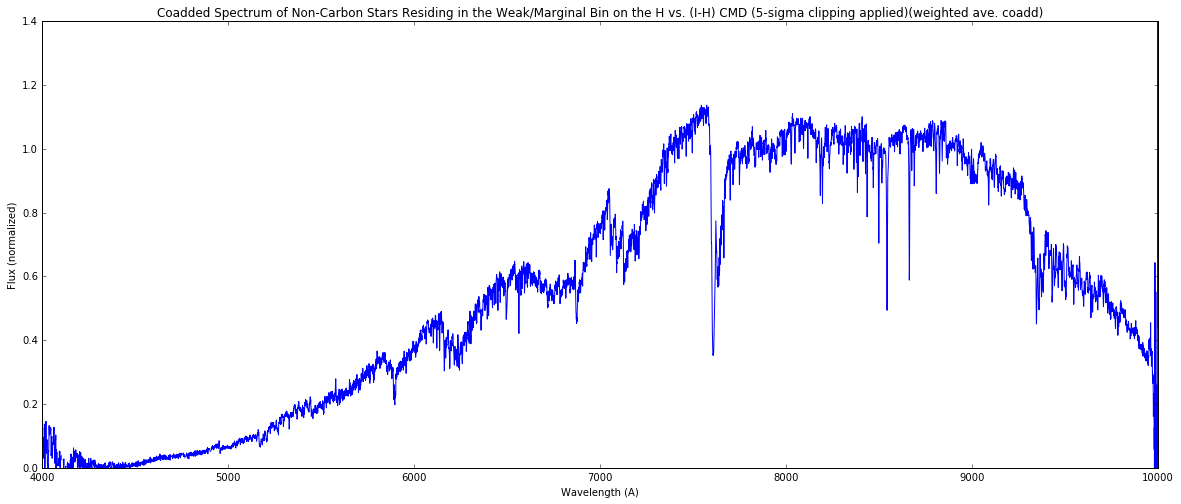

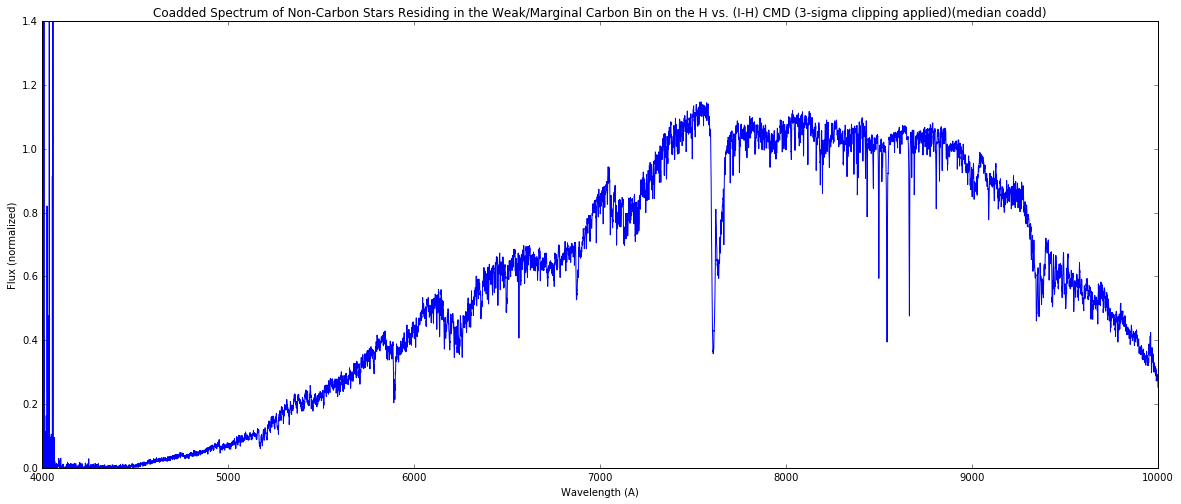

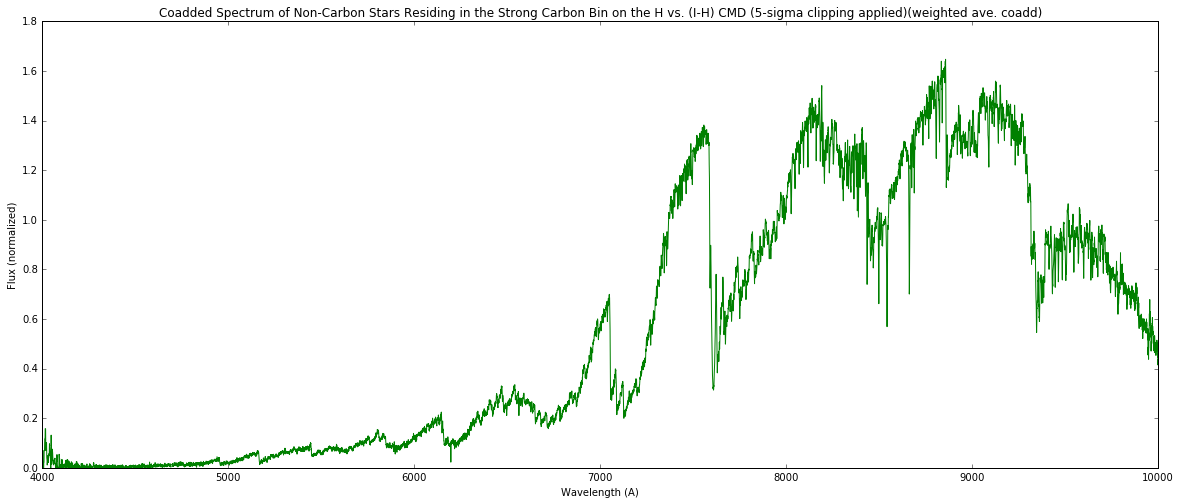

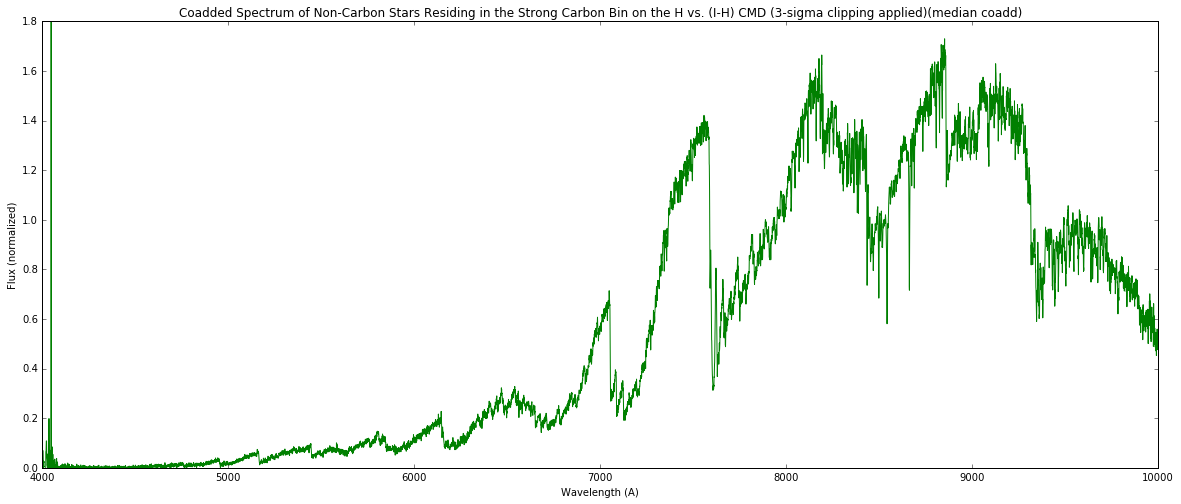

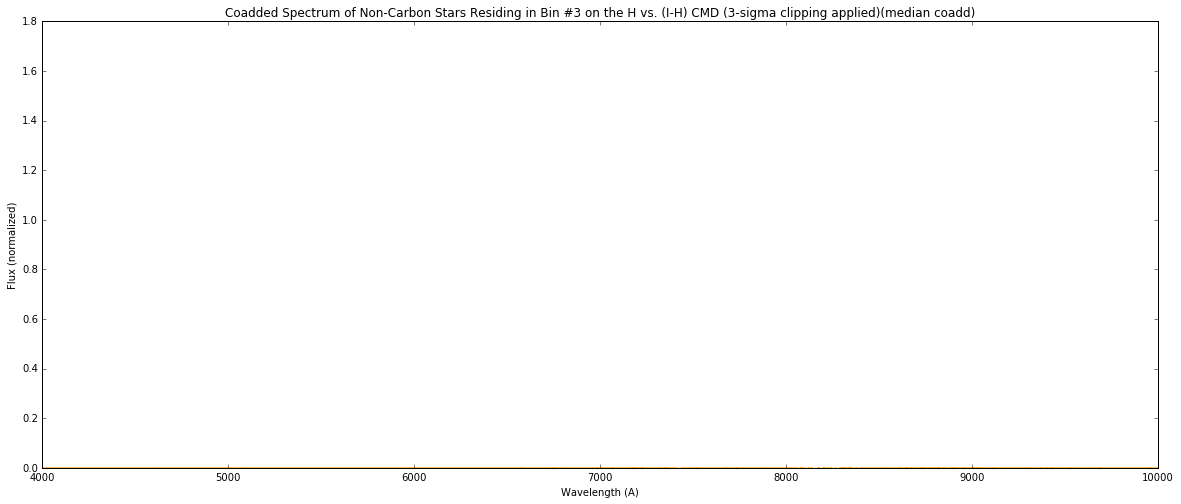

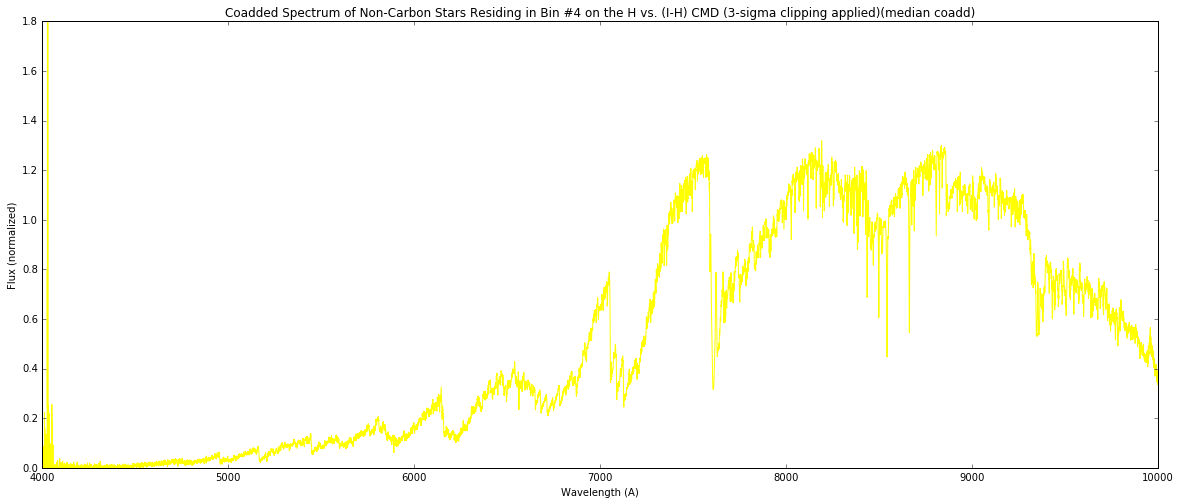

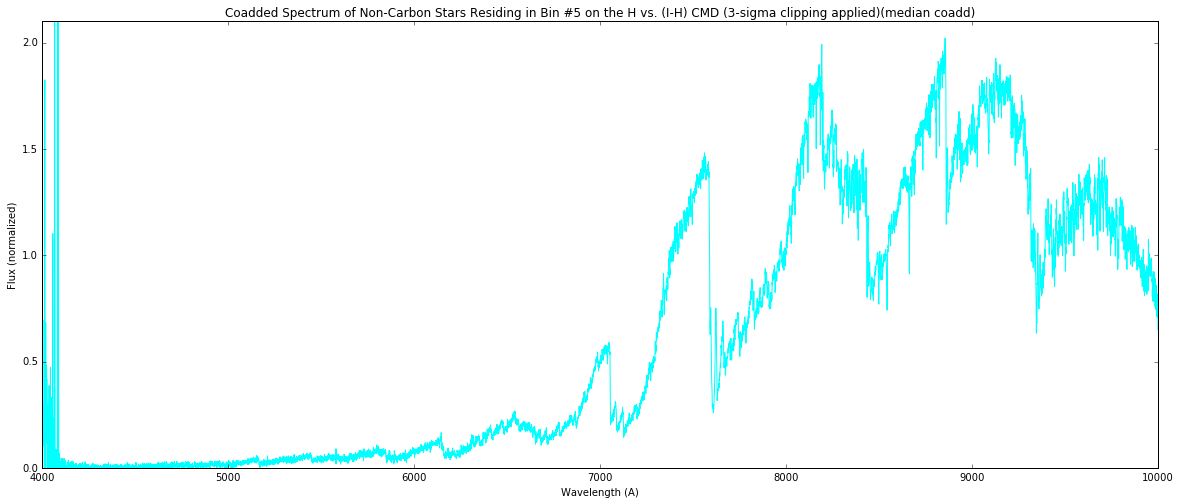

In [443]:
py.rcParams['figure.figsize'] = 20, 8

# weighted ave. coadd (katie's method) of non-carbons in weak/marginal bin
py.plot(wv, wZclipspec5, 'blue')
py.title('Coadded Spectrum of Non-Carbon Stars Residing in the Weak/Marginal Bin on the H vs. (I-H) CMD (5-sigma clipping applied)(weighted ave. coadd)')
py.xlabel('Wavelength (A)')
py.ylabel('Flux (normalized)')
py.ylim([0, 1.4])

# median coadd (Elisa's method) of non-carbon in weak/marginal bin
py.figure(2)
py.plot(wv, wNmBinCoadd3med, 'blue')
py.title('Coadded Spectrum of Non-Carbon Stars Residing in the Weak/Marginal Carbon Bin on the H vs. (I-H) CMD (3-sigma clipping applied)(median coadd)')
py.xlabel('Wavelength (A)')
py.ylabel('Flux (normalized)')
py.ylim([0, 1.4])

# weighted ave. coadd (katie's method) of non-carbons in strong bin
py.figure(3)
py.plot(wv, sZclipspec5, 'green')
py.title('Coadded Spectrum of Non-Carbon Stars Residing in the Strong Carbon Bin on the H vs. (I-H) CMD (5-sigma clipping applied)(weighted ave. coadd)')
py.xlabel('Wavelength (A)')
py.ylabel('Flux (normalized)')
py.ylim([0, 1.8])

# median coadd (Elisa's method) of non-carbons in strong bin
py.figure(4)
py.plot(wv, sBinCoadd3med, 'green')
py.title('Coadded Spectrum of Non-Carbon Stars Residing in the Strong Carbon Bin on the H vs. (I-H) CMD (3-sigma clipping applied)(median coadd)')
py.xlabel('Wavelength (A)')
py.ylabel('Flux (normalized)')
py.ylim([0, 1.8])

# median coadd (Elisa's method) of non-carbons in bin #3
py.figure(5)
py.plot(wv, bin3Coadd, 'orange')
py.title('Coadded Spectrum of Non-Carbon Stars Residing in Bin #3 on the H vs. (I-H) CMD (3-sigma clipping applied)(median coadd)')
py.xlabel('Wavelength (A)')
py.ylabel('Flux (normalized)')
py.ylim([0, 1.8])

# median coadd (Elisa's method) of non-carbons in bin #4
py.figure(6)
py.plot(wv, bin4Coadd, 'yellow')
py.title('Coadded Spectrum of Non-Carbon Stars Residing in Bin #4 on the H vs. (I-H) CMD (3-sigma clipping applied)(median coadd)')
py.xlabel('Wavelength (A)')
py.ylabel('Flux (normalized)')
py.ylim([0, 1.8])

# median coadd (Elisa's method) of non-carbons in bin #5
py.figure(7)
py.plot(wv, bin5Coadd, 'cyan')
py.title('Coadded Spectrum of Non-Carbon Stars Residing in Bin #5 on the H vs. (I-H) CMD (3-sigma clipping applied)(median coadd)')
py.xlabel('Wavelength (A)')
py.ylabel('Flux (normalized)')
py.ylim([0, 2.1])

0.0